<a href="https://colab.research.google.com/github/vishal2002begani/machine_learning/blob/main/cat_dog_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://www.kaggle.com/datasets/salader/dogs-vs-cats dataset link

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# These commands are typically used when setting up Kaggle API credentials in a Jupyter notebook environment.
# The kaggle.json file contains your API token which allows you to interact with Kaggle's API programmatically. B
# y placing this file in the ~/.kaggle directory, it becomes accessible for the Kaggle API client.

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats #api key taken from kaggle

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:10<00:00, 214MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [5]:
import zipfile #downloaded file is in zip format to extract folder
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [26]:
# generators
# here we will create object of data generator where each image is labeled and converted into a tensor
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',     #path of image
    labels='inferred',                #this means that the name of the class will be taken as the name of the directory
    label_mode = 'int',               #name of the class will be given in integer format
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [27]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process) #The map method of the train_ds dataset applies the process function to each element of the dataset.
validation_ds = validation_ds.map(process)

In [42]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 1.0952 - accuracy: 0.6233 - val_loss: 0.6135 - val_accuracy: 0.6860
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5396 - accuracy: 0.7304 - val_loss: 0.5158 - val_accuracy: 0.7426
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4954 - accuracy: 0.7655 - val_loss: 0.4444 - val_accuracy: 0.7936
Epoch 4/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4194 - accuracy: 0.8117 - val_loss: 0.6125 - val_accuracy: 0.7460
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3691 - accuracy: 0.8366 - val_loss: 0.5338 - val_accuracy: 0.7762
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3040 - accuracy: 0.8680 - val_loss: 0.5001 - val_accuracy: 0.8096
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2288 - accuracy: 0.9056 - val_loss: 0.7854 - val_ac

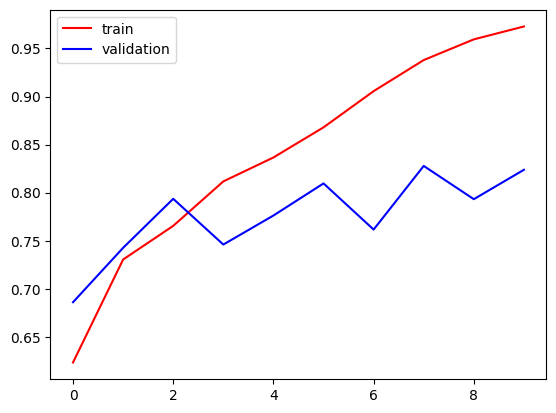

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

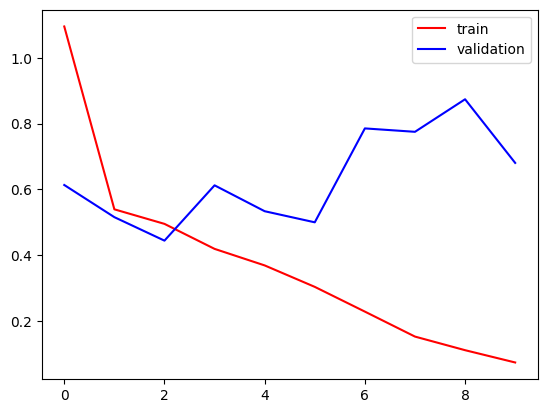

In [47]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [48]:
# ways to reduce overfitting
# BatchNormalization
# Dropout
# augumentation
# L1/L2 regularization
# reduce complexcity
# add mode data

(980, 980, 3)

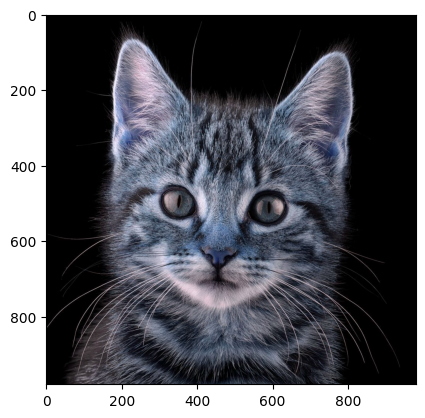

In [55]:
import cv2
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)
test_img.shape

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

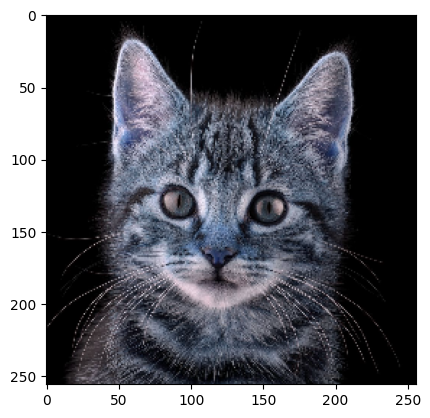

In [56]:
test_img.shape
test_img=cv2.resize(test_img,(256,256))
plt.imshow(test_img)
test_input=test_img.reshape(1,256,256,3)#we are passing our data into batches into this model so we converted this into a tensor
test_input.shape
model.predict(test_input)